<a href="https://colab.research.google.com/github/seanzhu815/business-forecasting/blob/main/405_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Part1

##1

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SequentialFeatureSelector as skSFS
from sklearn.feature_selection import RFE
from sklearn.base import BaseEstimator
from sklearn import linear_model
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import r2_score,mean_squared_error
import warnings
import seaborn as sns


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import warnings

In [232]:
df = pd.read_excel("/content/drive/MyDrive/inflation.xlsx",0)

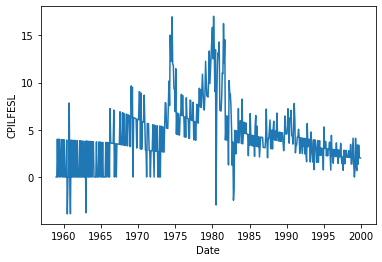

In [233]:
df_1999=df.iloc[:492,:]
df_1999.index=pd.to_datetime(df_1999['Date'],format='%Y%m',errors='coerce')
sns.lineplot(data=df_1999,x='Date',y='CPILFESL')

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [141]:
df_1999

,Date,CPILFESL,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,DCPILFESL
Date,,,,,,,,,,,,,,,,,,,,,
1959-01-01,1959-01-01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-02-01,1959-02-01,0.00000,0.003931,0.003613,0.010368,0.007358,0.007310,0.019397,0.013406,0.008623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1959-03-01,1959-03-01,4.01340,0.006430,0.007359,0.009410,-0.003423,0.008321,0.014301,0.006033,0.004899,...,0.000262,-0.000022,-0.008147,0.004819,NaN,0.004929,0.004138,-0.014792,NaN,inf
1959-04-01,1959-04-01,0.00000,0.006494,0.007049,-0.003639,0.019922,0.000616,0.021081,0.014337,0.014543,...,0.001752,-0.000022,0.012203,-0.004890,NaN,0.012134,0.006734,0.024929,NaN,-inf
1959-05-01,1959-05-01,3.99996,0.005763,0.006616,0.012005,0.006797,0.007803,0.014951,0.008271,0.009583,...,-0.001937,-0.000021,-0.004090,-0.004819,NaN,0.002828,0.002020,-0.015342,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-08-01,1999-08-01,1.35516,0.004731,0.004580,0.005206,0.007863,0.010717,0.004458,0.007633,0.010236,...,-0.000810,-0.002035,-0.002377,-0.001447,-1.5,0.034898,0.001984,0.001659,24.7277,-0.919138
1999-09-01,1999-09-01,3.38412,-0.000399,-0.000359,0.005007,-0.001815,0.004168,-0.004220,-0.005361,-0.007374,...,0.001476,0.004721,0.005336,0.001426,2.7,-0.060199,-0.002851,-0.000489,26.0494,0.915174
1999-10-01,1999-10-01,2.02476,0.006031,0.006649,0.002197,0.008748,0.001915,0.012894,0.013504,0.015008,...,-0.000417,-0.004053,-0.000022,-0.003580,-4.0,0.032110,-0.004752,0.002066,25.3700,-0.513643


In [79]:
mom_train=df_1999.iloc[:-123,1]
mom_test=df_1999.iloc[-123:,1]

In [ ]:
mom_model=SARIMAX(mom_train, trend='c',order=(1,0,0)).fit()
mom_model.summary()

In [81]:
mom_fit=pd.DataFrame(mom_model.predict()).reset_index()
train_mom_fitted=pd.concat([mom_train.reset_index(), mom_fit], axis=1)
train_mom_fitted.index= pd.to_datetime(mom_train.reset_index()['Date'], format='%Y-%m-%d', errors='coerce')
train_mom_fitted.drop(['Date','index'],axis=1,inplace=True)
train_mom_fitted

,CPILFESL,predicted_mean
Date,,
1959-01-01,0.00000,4.766357
1959-02-01,0.00000,1.822266
1959-03-01,4.01340,1.822266
1959-04-01,0.00000,4.301269
1959-05-01,3.99996,1.822266
...,...,...
1989-05-01,4.69488,4.149468
1989-06-01,4.67652,4.722207
1989-07-01,3.72672,4.710866


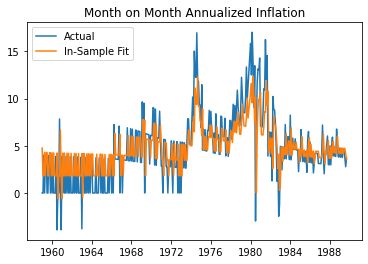

In [82]:
plt.plot(train_mom_fitted['CPILFESL'],label='Actual')
plt.plot(train_mom_fitted['predicted_mean'],label='In-Sample Fit')
plt.title('Month on Month Annualized Inflation')
plt.legend()

In [18]:
import itertools

In [83]:
def AIC_PDQ(df,ar,ii,ma): 

# Define the p, d and q parameters to take any user defined value. We need to be careful with integration order, cannot be 0.    p = range(0,ar)
    p = range(0,ar)
    d = range(0,ii)
    q = range(0, ma)

# Auto-Regressive (p) -> Number of autoregressive terms.
# Integrated (d) -> Number of nonseasonal differences needed for stationarity.
# Moving Average (q) -> Number of lagged forecast errors in the prediction equation.
# Generate all different combinations of p, q and q triplets
    pdq = list(itertools.product(p, d, q))

# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
    ans = []
    for comb in pdq:
        try:
            mod = ARIMA(df,
                      order=comb,
                      enforce_stationarity=False,
                      enforce_invertibility=False)
          
            output = mod.fit()
            ans.append([comb, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, output.aic))
        except:
            continue

    ans_df = pd.DataFrame(ans, columns=['pdq', 'aic'])
    return ans_df

In [ ]:
df_1999_train=df_1999['CPILFESL']
AIC_cpi = AIC_PDQ(df_1999_train,3,1,2)

In [119]:
minIndices = max(AIC_cpi.apply(lambda x:(np.argmin(x)),0))
print(f'The order for best AIC = {AIC_cpi.iloc[minIndices,0]} for Inflation ')

The order for best AIC = (1, 0, 1) for Inflation 


In [ ]:
  model_cpi=ARIMA(df_1999_train,order=(1,0,1),trend='c',enforce_stationarity=True,
enforce_invertibility=True)
fit_cpi=model_cpi.fit()
res_cpi = fit_cpi.resid

In [125]:
from statsmodels.stats import diagnostic as diag
def box_test(df,l):
    print(f'At lag of {l}')
    print(f'X-squared = {round(sm.stats.acorr_ljungbox(df, lags=[l], return_df=True, boxpierce=True).iloc[0,0],4)}')
    print(f'p-values = {round(sm.stats.acorr_ljungbox(df, lags=[l], return_df=True, boxpierce=True).iloc[0,1],4)}\n')
    return round(sm.stats.acorr_ljungbox(df, lags=[l], return_df=True, boxpierce=True).iloc[0,0],4),round(sm.stats.acorr_ljungbox(df, lags=[l], return_df=True, boxpierce=True).iloc[0,1],4)

In [ ]:
box_test(res_cpi,1)
box_test(res_cpi,10)

In [127]:
fitted_cpi = pd.DataFrame(df_1999_train)
fitted_cpi['predicted'] = fit_cpi.predict()
fitted_cpi.columns = ['actual','predicted']
fitted_cpi=fitted_cpi.reset_index().melt(id_vars='Date')

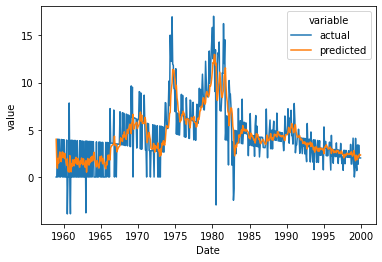

In [128]:
sns.lineplot(data=fitted_cpi,x='Date',y='value',hue='variable')

We fail to reject the null hypothesis of no serial correlation for the model. 

In [129]:
fit_cpi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               CPILFESL   No. Observations:                  492
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1096.979
Date:                Tue, 18 Oct 2022   AIC                           2201.958
Time:                        03:01:32   BIC                           2218.752
Sample:                    01-01-1959   HQIC                          2208.553
                         - 12-01-1999                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0014      1.111      3.603      0.000       1.825       6.178
ar.L1          0.9774      0.009    114.092      0.000       0.961       0.994
ma.L1         -0.7490      0.027    -27.948      0.000      -0.801      -0.696
sigma2         5.0469      0.205     24.560      0.000       4.644       5.450
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):               442.73
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                            -0.52
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## 2

In [299]:
def forward_stepwise_selection(input_data,to_predict,k,cc,return_features=True):
    start = cc
    x_new = input_data.loc[:start-1,]
    y_new = to_predict[:start]
    param_list=[]
    predict_is=[]
    predict_oos=[]
    rmse_train=[]
    rmse_test=[]
    r_squared=[]
    const_list=['const']
    lr = LinearRegression()  #Linear regression function
    for i in range(start,len(X)):
      x_new = X.loc[:start-1,]
      y_new = Y[:start]
      sfs = SFS(lr, k_features=k, #stepwise selection 
                    forward=True, 
                    scoring='neg_mean_squared_error',
                    cv=0)
      sfs = sfs.fit(x_new, y_new) # fit the stepwise model
      x_train=sm.add_constant(x_new[np.array(sfs.subsets_[k]['feature_names']).tolist()])
      reg=sm.OLS(y_new,x_train).fit()
      prediction_train=reg.predict(sm.add_constant(x_new[np.array(sfs.subsets_[k]['feature_names']).tolist()]))
      predict_is.append(prediction_train)
      x_test=pd.DataFrame(X.loc[i]).T
      prediction_test=reg.predict(sm.add_constant(x_test[const_list+np.array(sfs.subsets_[k]['feature_names']).tolist()]))
      predict_oos.append(prediction_test)
      param_list.append(np.array(np.array(sfs.subsets_[k]['feature_names']).tolist()))
      rmse_train.append(mean_squared_error(y_new, prediction_train))
      r_squared.append(r2_score(y_new, prediction_train))
      rmse_train.append(mean_squared_error(y_new, prediction_train))
      start = i
      x_new = x_new.append(pd.DataFrame(X.loc[start]).T)
      y_new = y_new.append(pd.Series(Y[start]))
    rmse_test.append(mean_squared_error(to_predict[cc:], predict_oos))    
    
    if return_features:
      return rmse_train, rmse_test, r_squared,predict_is,predict_oos, param_list
    else:
      return rmse_train, rmse_test, r_squared,predict_is,predict_oos

def backward_stepwise_selection(input_data,to_predict,k,cc,return_features=True):
    start = cc
    x_new = input_data.loc[:start-1,]
    y_new = to_predict[:start]
    param_list=[]
    predict_is=[]
    predict_oos=[]
    rmse_train=[]
    rmse_test=[]
    r_squared=[]
    const_list=['0']
    lr = LinearRegression()  #Linear regression function
    for i in range(start,len(X)):
        sfs = SFS(lr, k_features=k, #stepwise selection 
              forward=False, 
              scoring='neg_mean_squared_error',
              cv=0)
        sfs = sfs.fit(x_new.values, y_new.values)
        names_list=const_list+np.array(sfs.subsets_[k]['feature_names']).tolist()
        names=list(map(int, names_list))
        x_train = x_new.iloc[:,names]
        reg=sm.OLS(y_new,x_train).fit()
        prediction_train=reg.predict(x_train)
        predict_is.append(prediction_train)
        x_test=pd.DataFrame(input_data.loc[i]).T
        prediction_test=reg.predict(x_test.iloc[:,names])
        predict_oos.append(prediction_test)
        param_list.append(np.array(np.array(sfs.subsets_[k]['feature_names']).tolist()))
        r_squared.append(r2_score(y_new, prediction_train))
        rmse_train.append(mean_squared_error(y_new, prediction_train))
        start = i
        x_new = x_new.append(pd.DataFrame(X.loc[start]).T)
        y_new = y_new.append(pd.Series(Y[start]))
        y_new=y_new.reset_index(drop=True)

    rmse_test.append(mean_squared_error(to_predict[cc:], predict_oos))    
    
    if return_features:
      return rmse_train, rmse_test, r_squared,predict_is,predict_oos, param_list
    else:
      return rmse_train, rmse_test, r_squared,predict_is,predict_oos

In [298]:
df1 = pd.read_excel("/content/drive/MyDrive/inflation.xlsx",0)
date = pd.to_datetime(df1['Date'], format='%Y%m', errors='coerce')
df1.drop('Date', axis=1, inplace=True)

In [279]:
X = df1.loc[398:492].reset_index(drop=True)
Y = df1.loc[398:492,'CPILFESL'].reset_index(drop=True)
X.drop(['CPILFESL'],axis=1,inplace=True)
X=sm.add_constant(X)
date=date[398:492]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [280]:
X


,const,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,1.0,0.001653,0.000812,0.001824,0.004017,-0.003001,0.008279,0.008512,0.008994,0.009106,...,0.001266,-0.000199,0.000836,0.011670,-0.003556,7.2,-0.016313,0.001663,-0.003653,16.2227
1,1.0,0.003730,0.002751,0.000839,0.006642,0.006017,0.007593,0.007433,0.007599,0.009344,...,-0.002156,0.000777,0.000830,-0.005836,0.001759,1.2,0.037147,-0.005843,0.001010,16.1885
2,1.0,0.005329,0.005493,0.005146,-0.008738,0.005467,0.003221,0.005498,0.005804,0.006482,...,0.000976,-0.002553,-0.002514,-0.000726,-0.000890,2.0,-0.052941,0.000207,0.004327,14.7280
3,1.0,0.004173,0.004447,0.002696,0.010487,0.002804,0.000539,-0.002438,-0.003092,-0.004904,...,0.003189,0.000237,0.002500,0.007957,-0.000883,1.2,0.045621,0.008812,-0.001184,14.7531
4,1.0,-0.000796,-0.001346,0.003342,0.013303,0.007080,0.008911,0.009982,0.011293,0.012977,...,-0.002334,0.002648,-0.004169,-0.015187,-0.000003,-3.8,-0.003523,-0.008544,0.002648,13.3036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1.0,-0.000399,-0.000359,0.005007,-0.001815,0.004168,-0.004220,-0.005361,-0.007374,-0.007842,...,0.003549,0.001476,0.004721,0.005336,0.001426,2.7,-0.060199,-0.002851,-0.000489,26.0494
91,1.0,0.006031,0.006649,0.002197,0.008748,0.001915,0.012894,0.013504,0.015008,0.019292,...,-0.006847,-0.000417,-0.004053,-0.000022,-0.003580,-4.0,0.032110,-0.004752,0.002066,25.3700
92,1.0,0.006911,0.008011,0.004905,0.005156,0.011948,0.005209,0.001109,-0.000693,-0.000714,...,-0.002364,-0.000343,-0.000002,-0.004720,0.001429,4.0,0.005214,0.002042,-0.011789,22.2295
93,1.0,0.008174,0.008851,0.011899,0.004322,0.018317,0.007834,0.008984,0.009121,0.010821,...,0.007839,-0.000327,0.002007,0.004112,0.002134,-1.8,0.012954,0.000935,0.017419,23.2213


In [259]:
train_X = X[:345]
train_Y = Y[:345]
train_date=date[:345]
val_X = X[345:394]
val_Y = Y[345:394]
val_date=date[345:395]
test_X = X[395:]
test_Y = Y[395:]
test_date=date[395:]
train_val_X=X[:394]
train_val_Y=Y[:394]

In [260]:
def MSE(actual, pred):
    sse = [(a-p)**2 for a,p in zip(actual,pred)]
    return(np.mean(sse))

In [300]:
f_rmse_train,f_rmse_test, f_r_squared, f_predict_is, f_predict_oos, f_param_list=forward_stepwise_selection(X,Y,3,94)
b_rmse_train,b_rmse_test, b_r_squared, b_predict_is, b_predict_oos, b_param_list=backward_stepwise_selection(X,Y,3,94)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [301]:
f_param_list

[array(['PERMITW', 'CPIAPPSL', 'CUSR0000SAS'], dtype='<U11')]

In [327]:
b_param_list

[array(['35', '53', '111'], dtype='<U3')]

In [336]:
X.columns[111]

'CUSR0000SAS'

#Part3